# **Specific Data Analysis**:<a class="anchor" id="0"></a>


1. [**products**](#1)
2. [**orders**](#2)
3. [**order_products__prior**](#3)
4. [**departments**](#4)

In [3]:
import os

import numpy as np
import pandas as pd

from _util.custom_plotting import *
from _util.custom_mem_opt import custom_mem_opt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

import pprint
pp = pprint.PrettyPrinter(width=25, compact=True)

root = './_data/'

The dataset contains relational set of files describing customers' orders over time. For each user, 4 to 100 orders are provided with the sequence of products purchased in each order. The data of the order's week and hour of the day as well as a relative measure of time between orders is provided.

**Files in the Dataset:** 

In [4]:
pp.pprint(os.listdir('_data/'))

['products.csv',
 'orders.csv',
 'order_products__train.csv',
 'departments.csv',
 'aisles.csv',
 'order_products__prior.csv',
 'sample_submission.csv']


In [5]:
aisles = custom_mem_opt(pd.read_csv(root + 'aisles.csv'), verbose=False)
departments = custom_mem_opt(pd.read_csv(root + 'departments.csv'), verbose=False)
orders = custom_mem_opt(pd.read_csv(root + 'orders.csv'), verbose=False)
order_products_prior = custom_mem_opt(pd.read_csv(root + 'order_products__prior.csv'), verbose=False)
order_products_train = custom_mem_opt(pd.read_csv(root + 'order_products__train.csv'), verbose=False)
products = custom_mem_opt(pd.read_csv(root + 'products.csv'), verbose=False)

### products: <a class=anchor id="1"></a>
[Back to top](#0)

- 49688 products by aisle and department.
- Variation of product ct. by aisle / dept.

In [7]:
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [8]:
print(len(products.product_name.unique()))

49688


In [9]:
print(len(products.aisle_id.unique()))

134


In [10]:
print(len(products.department_id.unique()))

21


In [11]:
temp_df = pd.DataFrame(products.groupby('aisle_id')['product_id'].count()).reset_index()
temp_df.columns = ['aisle_id', 'product_count']

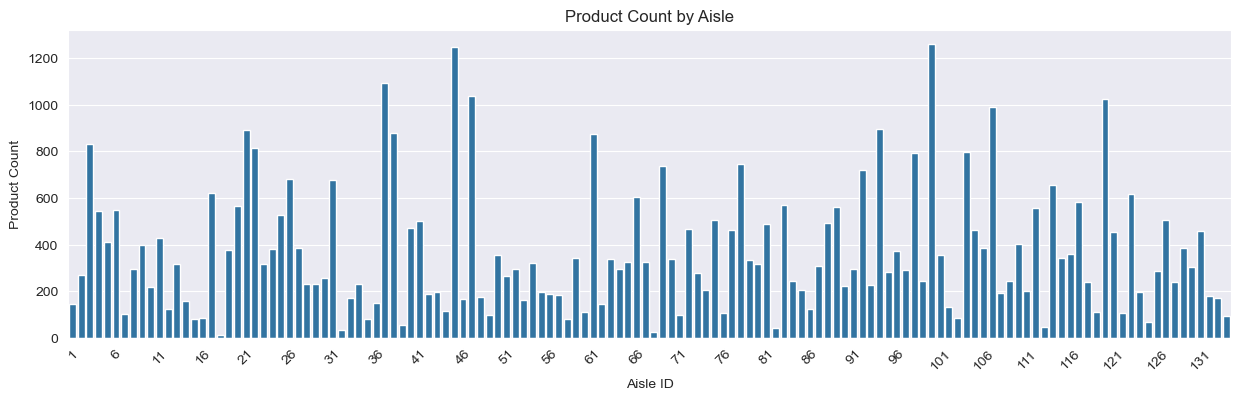

In [12]:
simple_bar(temp_df
           , x='aisle_id'
           , y='product_count'
           , title='Product Count by Aisle'
           , xlabel='Aisle ID'
           , ylabel='Product Count'
           , palette=None
           , figsize=(15, 4))

In [13]:
temp_df = pd.DataFrame(products.groupby('department_id')['product_id'].count()).reset_index()
temp_df.columns = ['department_id', 'product_count']

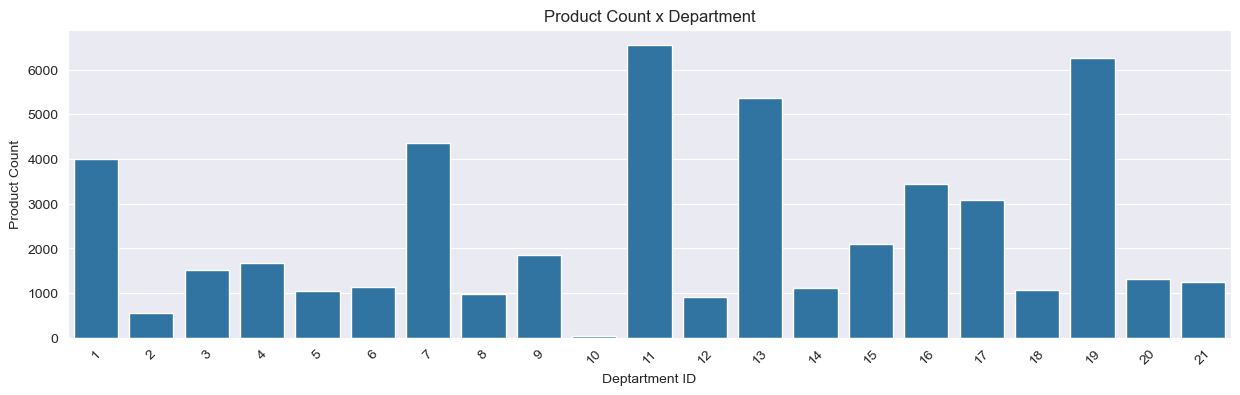

In [14]:
simple_bar(temp_df
           , x='department_id'
           , y='product_count'
           , title='Product Count x Department'
           , xlabel='Deptartment ID'
           , ylabel='Product Count'
           , palette=None
           , n=1
           , figsize=(15, 4))

In [15]:
temp_df = pd.DataFrame(products.groupby('department_id')['aisle_id'].nunique()).reset_index()
temp_df.columns = ['department_id', 'aisle_count']

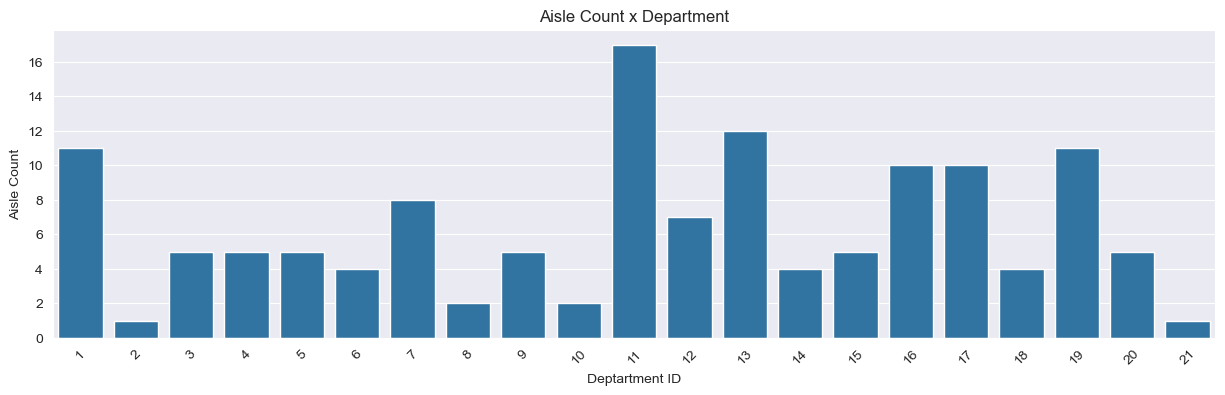

In [16]:
simple_bar(temp_df
           , x='department_id'
           , y='aisle_count'
           , title='Aisle Count x Department'
           , xlabel='Deptartment ID'
           , ylabel='Aisle Count'
           , palette=None
           , n=1
           , figsize=(15, 4))